# 0.0 Import

In [12]:
import pickle

import numpy                as np
import pandas               as pd
import seaborn              as sns
import matplotlib.patches   as mpatches

from matplotlib import pyplot as plt

import funcoes_suporte as fs

## 0.1 Help functions

In [13]:
fs.jupyter_settings(altura= 18, largura= 14, fonte= 11)
fs.supressao_notacao()

## 0.2 Load interim data

In [ ]:
x_treino = pickle.load( open( "../data/interim/x_treino_fe.pkl", "rb" ) )
y_treino = pickle.load( open("../data/interim/y_treino.pkl","rb"))
df = x_treino.copy()
df["resposta"] = y_treino.values
df.head()

,id,genero,idade,codigo_regiao,contato_cliente,cnh,idade_veiculo,veiculo_danificado,seguro_previo_automovel,premio_anual,cliente_dias_contrato,idade_class_etaria,premio_anual_cat,semanas_contrato,meses_contrato,resposta
55914,55915,Male,33,29.000,124.000,1,3,0,0,26761.000,139,1,2,19.857,4.633,0
179876,179877,Male,55,28.000,26.000,1,3,0,0,27875.000,285,2,2,40.714,9.500,1
300095,300096,Female,26,28.000,152.000,1,3,0,1,43562.000,118,1,2,16.857,3.933,0
60078,60079,Male,57,38.000,124.000,1,3,0,1,51365.000,249,2,3,35.571,8.300,0
312426,312427,Male,27,42.000,152.000,1,3,0,0,26590.000,161,1,2,23.000,5.367,0


In [21]:
del x_treino, y_treino

# 1.0 EDA

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266776 entries, 55914 to 121958
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       266776 non-null  int64  
 1   genero                   266776 non-null  object 
 2   idade                    266776 non-null  int64  
 3   codigo_regiao            266776 non-null  float64
 4   contato_cliente          266776 non-null  float64
 5   cnh                      266776 non-null  int64  
 6   idade_veiculo            266776 non-null  int64  
 7   veiculo_danificado       266776 non-null  int64  
 8   seguro_previo_automovel  266776 non-null  int64  
 9   premio_anual             266776 non-null  float64
 10  cliente_dias_contrato    266776 non-null  int64  
 11  idade_class_etaria       266776 non-null  int64  
 12  premio_anual_cat         266776 non-null  int64  
 13  semanas_contrato         266776 non-null  float64
 14  meses

## 1.1 Univariada

### 1.1.0 Estatística

In [23]:
var_num = df.select_dtypes(include=['int64','float64'])

In [24]:
fs.estatistica_descritiva(var_num)

e:\3_recursos\2_area\profissional\cursos\22_06.1 - PA004\notebooks\funcoes_suporte.py:75: RuntimeWarning: invalid value encountered in scalar divide
  cv = pd.DataFrame(df.apply(lambda x : x.std() / x.mean())).T


,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,iqr,assimetria,curtosis,cv
0,id,2.000,381108.000,381106.000,190548.259,190543.500,110059.964,190549.500,0.001,-1.200,0.578
1,idade,20.000,85.000,65.000,38.852,36.000,15.515,24.000,0.668,-0.573,0.399
2,codigo_regiao,0.000,52.000,52.000,26.414,28.000,13.215,20.000,-0.118,-0.863,0.500
3,contato_cliente,1.000,163.000,162.000,111.938,128.000,54.243,126.000,-0.896,-0.978,0.485
4,cnh,0.000,1.000,1.000,0.998,1.000,0.046,0.000,-21.414,456.561,0.047
5,idade_veiculo,3.000,3.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000
6,veiculo_danificado,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
7,seguro_previo_automovel,0.000,1.000,1.000,0.458,0.000,0.498,1.000,0.167,-1.972,1.087
8,premio_anual,2630.000,540165.000,537535.000,30580.218,31680.000,17260.707,15005.250,1.863,36.726,0.564
9,cliente_dias_contrato,10.000,299.000,289.000,154.277,154.000,83.670,145.000,0.005,-1.200,0.542


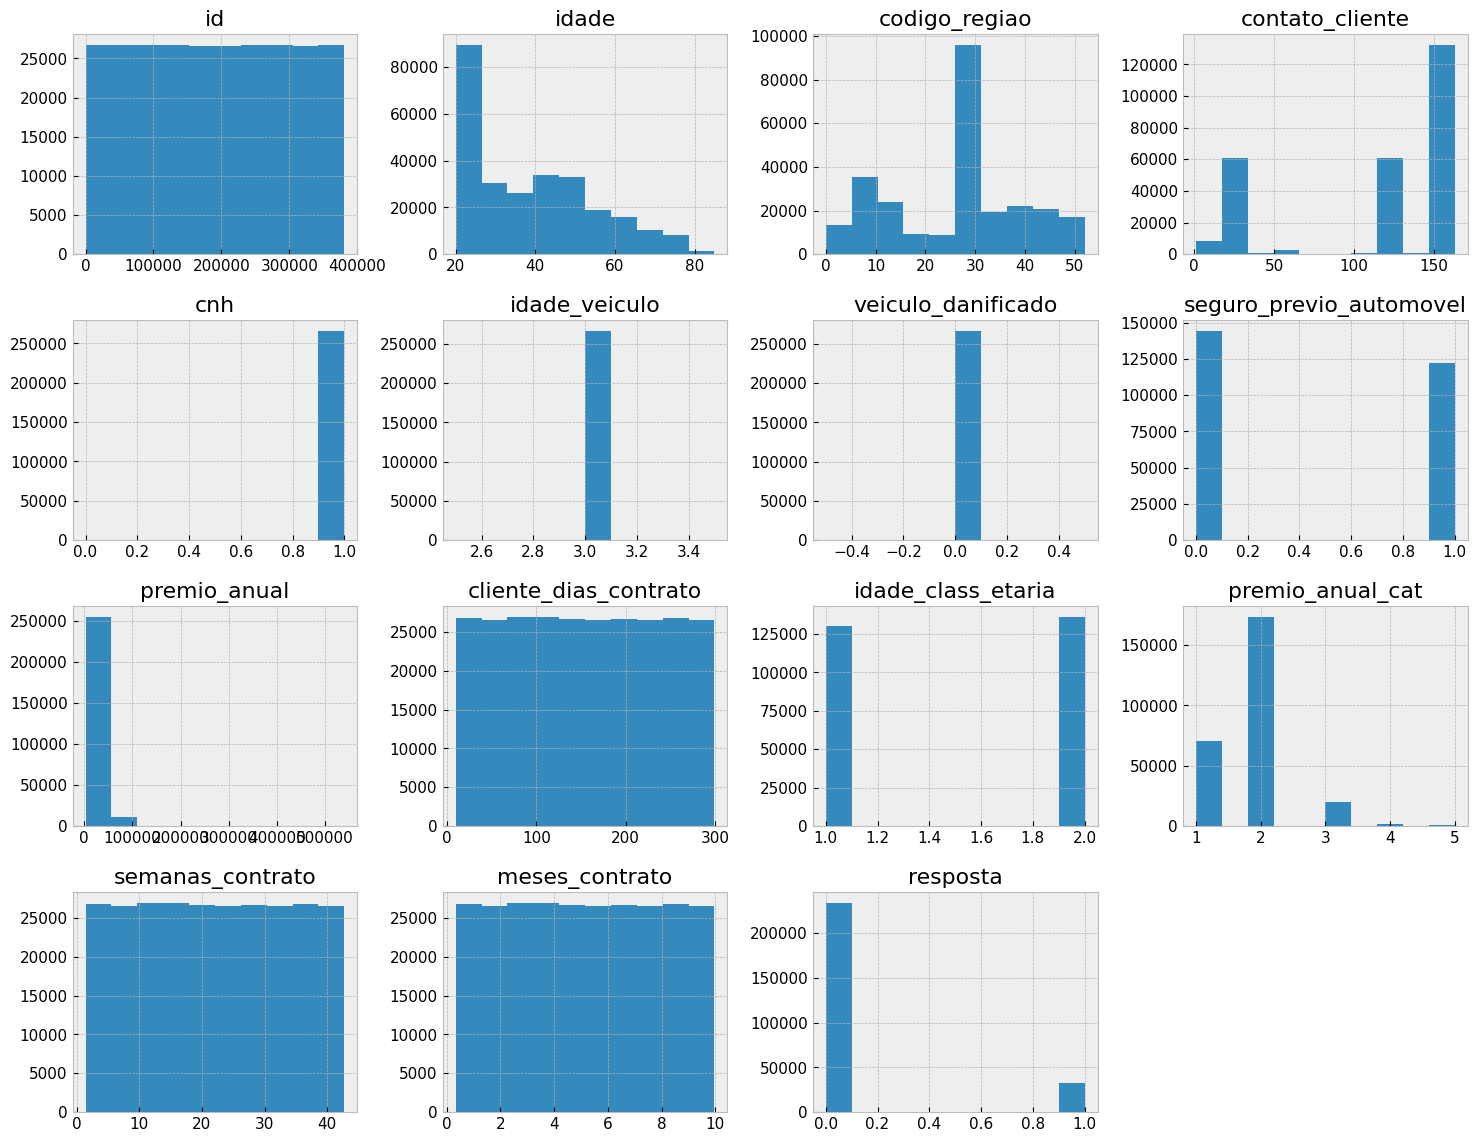

In [25]:
var_num.hist();

### 1.1.1 idade

<Axes: xlabel='idade', ylabel='Count'>

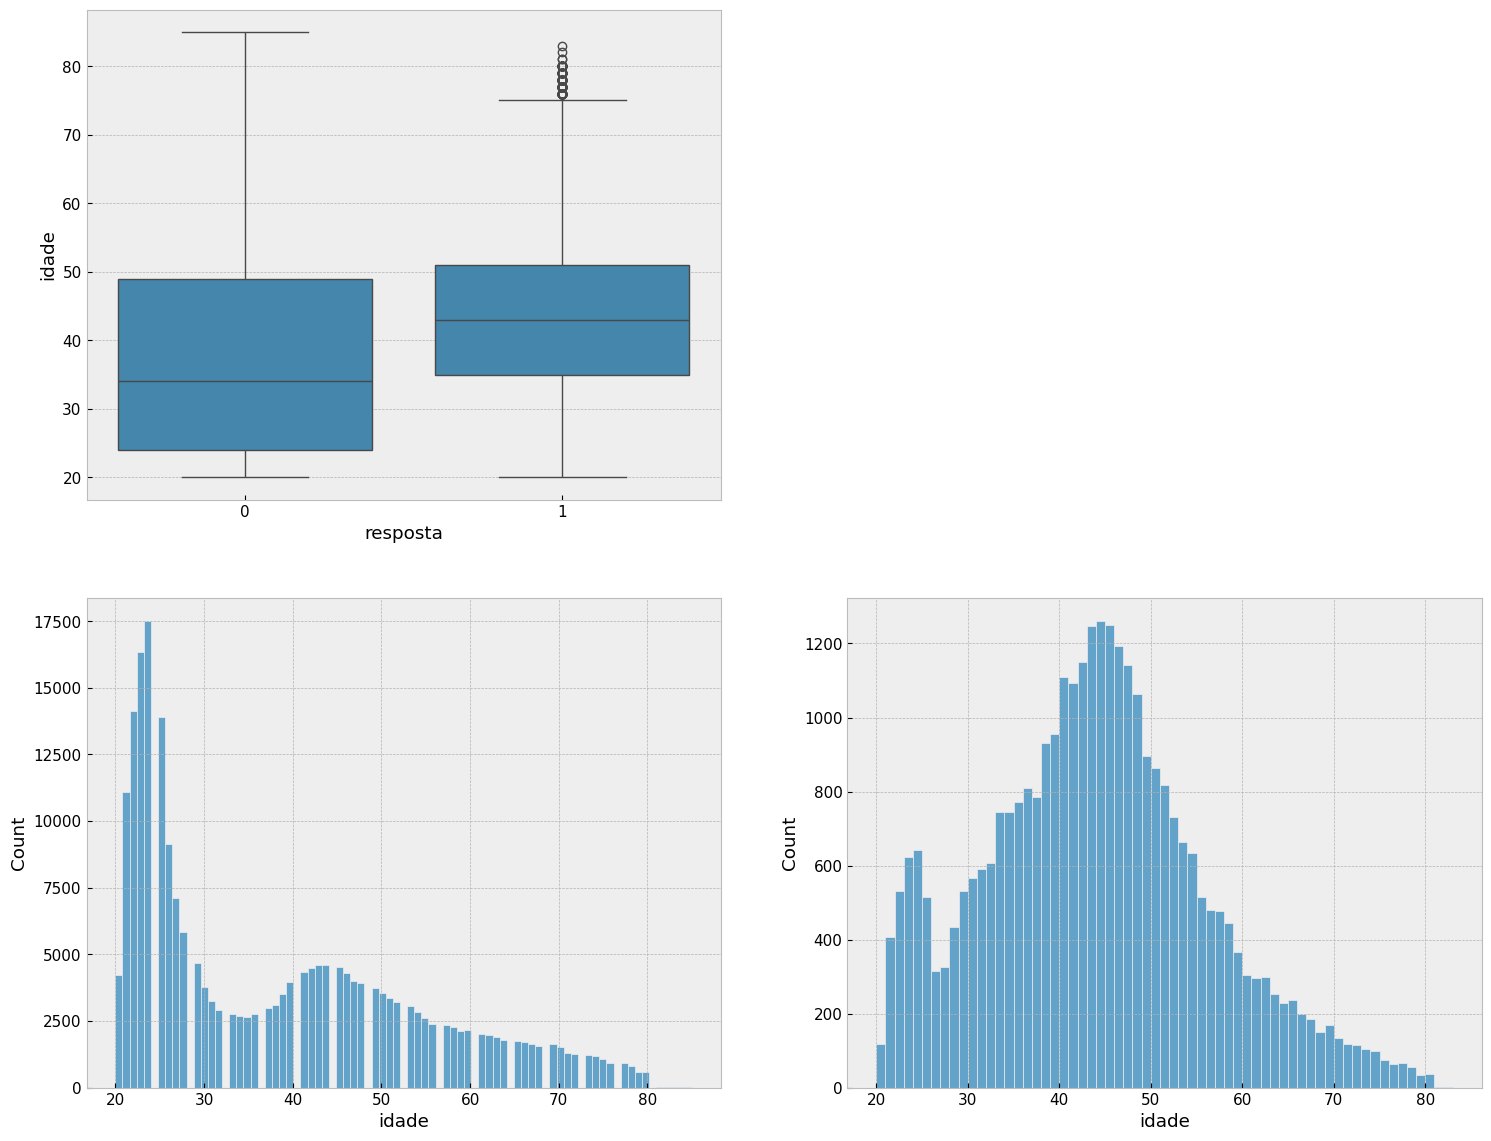

In [6]:
#'idade'
plt.subplot(2,2,1)
sns.boxplot(x='resposta', y='idade', data=df)

aux1 = df.loc[df['resposta'] == 0, 'idade']
plt.subplot(2,2,3)
sns.histplot(x=aux1)

aux2 = df.loc[df['resposta'] == 1, 'idade']
plt.subplot(2,2,4)
sns.histplot(x=aux2)

Insight:

 - Pessoas na idade entre 35 e 50 anos tem mais interesse no produto.

 - Pelo boxplot há uma concentração de dados para pessoas mais velhas.

 - Pessoas a baixo de 30 anos tem menos interesse no produto.

 - Cuidado com o balanceamento dos dados.

 - Idade pode ser útil para o modelo.

In [7]:
del aux1, aux2

### 1.1.2 premio_anual

<Axes: xlabel='premio_anual', ylabel='Count'>

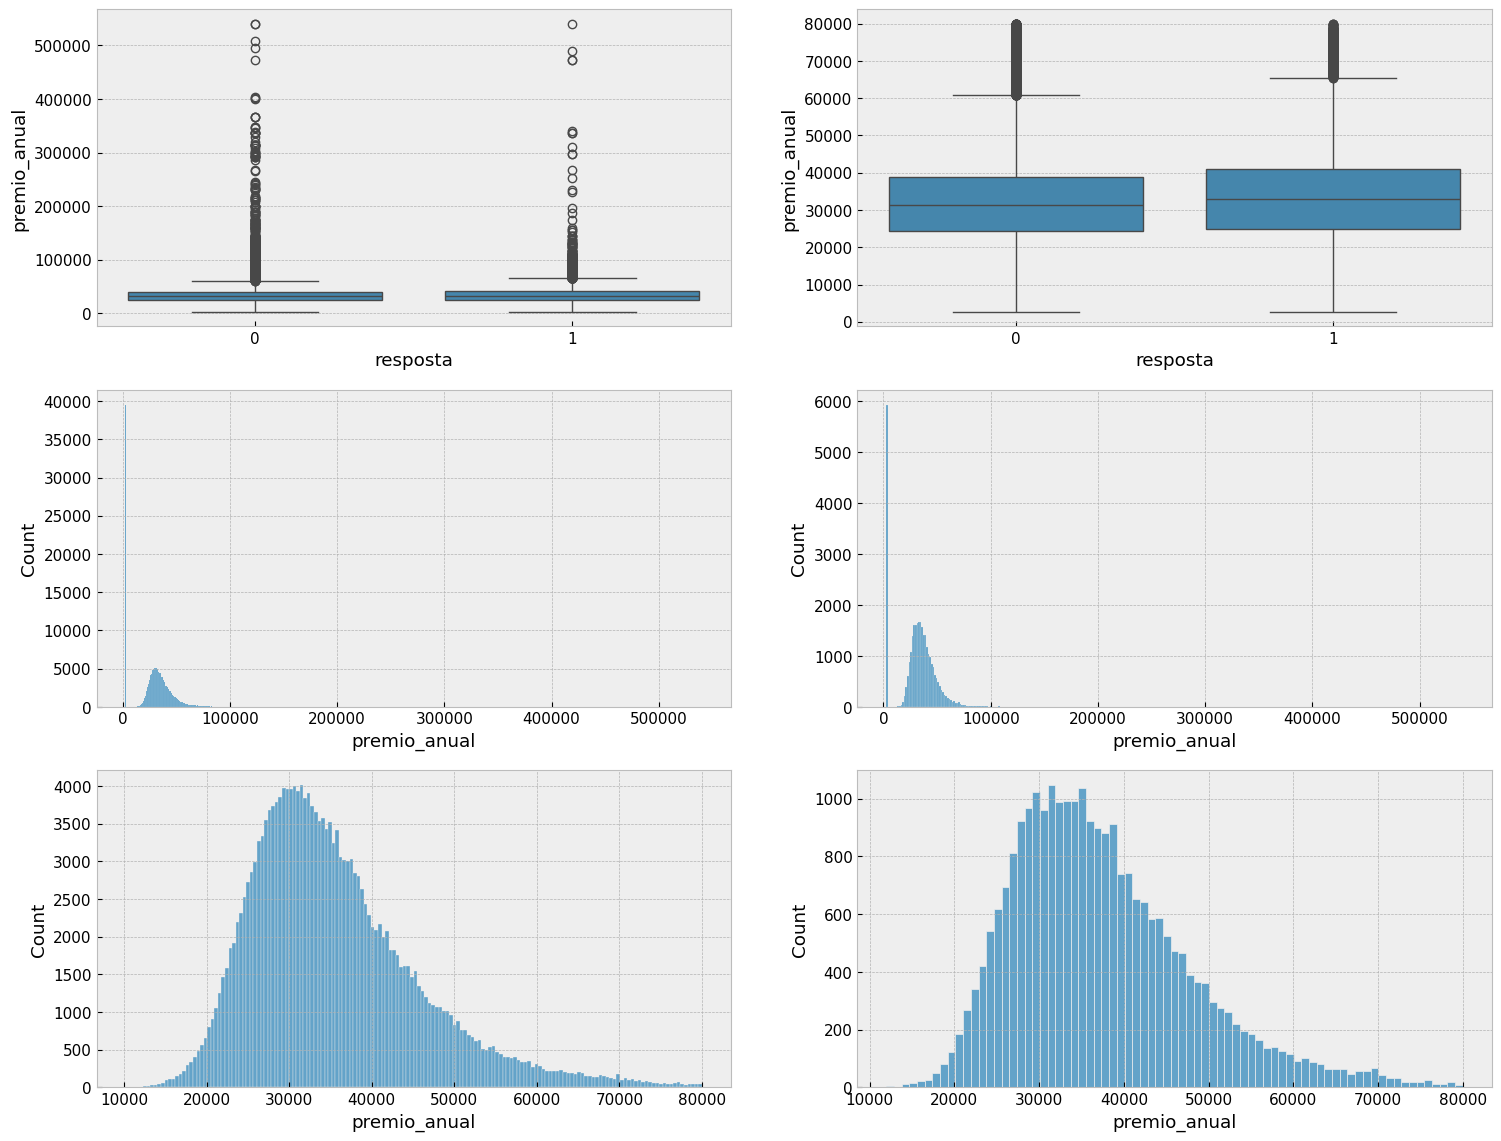

In [8]:
#'premio_anual'
#plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.boxplot(x='resposta', y='premio_anual', data=df)

aux1 = df[df['premio_anual'] < 80000]
plt.subplot(3,2,2)
sns.boxplot(x='resposta', y='premio_anual', data=aux1)

aux2 = df.loc[df['resposta'] == 0, 'premio_anual']
plt.subplot(3,2,3)
sns.histplot(x=aux2)

aux3 = df.loc[df['resposta'] == 1, 'premio_anual']
plt.subplot(3,2,4)
sns.histplot(x=aux3)

# Filto pelo valor do premio_anual #
aux4 = df[(df['premio_anual'] > 10000) & (df['premio_anual'] < 80000)]

aux5 = aux4.loc[aux4['resposta'] == 0, 'premio_anual']
plt.subplot(3,2,5)
sns.histplot(x=aux5)

aux6 = aux4.loc[aux4['resposta'] == 1, 'premio_anual']
plt.subplot(3,2,6)
sns.histplot(x=aux6)

Insight:

 - Há muitos outliers.

 - No boxplot não há diferênça factual entre as distribuições.

 - Cuidado com o balanceamento dos dados.

 - As curvas estão bem parecida, então essa variável não me diz muita coisa.

 - Essa variável pode ser atrelada a outras para ajudar no Modelo.

In [9]:
del aux1, aux2, aux3, aux4, aux5, aux6

### 1.1.3 cnh

C:\Users\gbnob\AppData\Local\Temp\ipykernel_26400\1134218845.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.barplot(x='resposta', y='cnh', data=aux1, ci= True)
C:\Users\gbnob\AppData\Local\Temp\ipykernel_26400\1134218845.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.barplot(x='resposta', y='cnh_percent', data=aux1, ci= True)


,resposta,cnh,cnh_percent
0,0,233654,0.878
1,1,32544,0.122


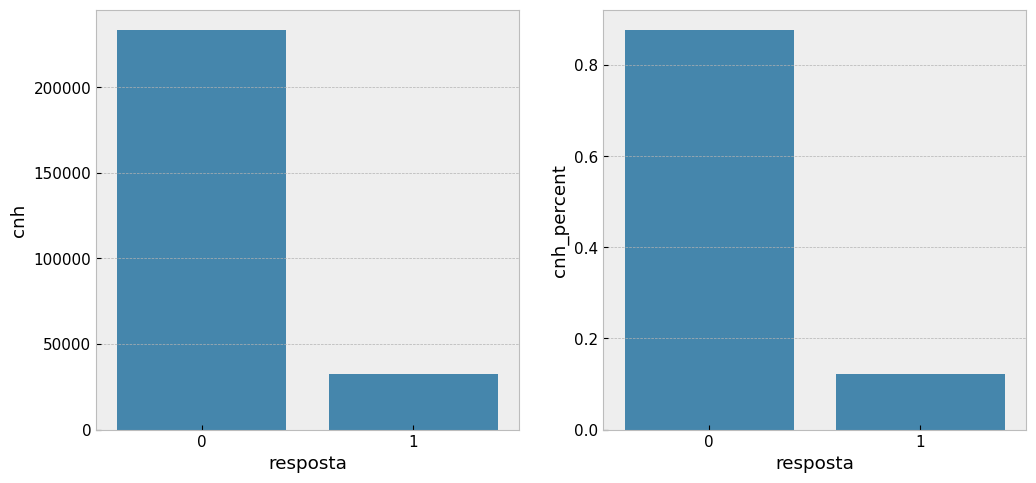

In [10]:
#'cnh'
plt.figure(figsize=(12,12))

aux1 = df[['cnh', 'resposta']].groupby(['resposta']).sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(x='resposta', y='cnh', data=aux1, ci= True)

aux1['cnh_percent'] = aux1['cnh'] / aux1['cnh'].sum()
plt.subplot(2,2,2)
sns.barplot(x='resposta', y='cnh_percent', data=aux1, ci= True)

aux1

Insight:

 - Muito interessante, quem tem CNH tem bem menos predisposição a contratar o produto.

 - Atenção a idade pode está interferindo nessa visualização.

 - Deve ser analizado, pelo menos, em conjunto com a idade.

In [11]:
del aux1

### 1.1.4 codigo_regiao

<Axes: xlabel='codigo_regiao', ylabel='id'>

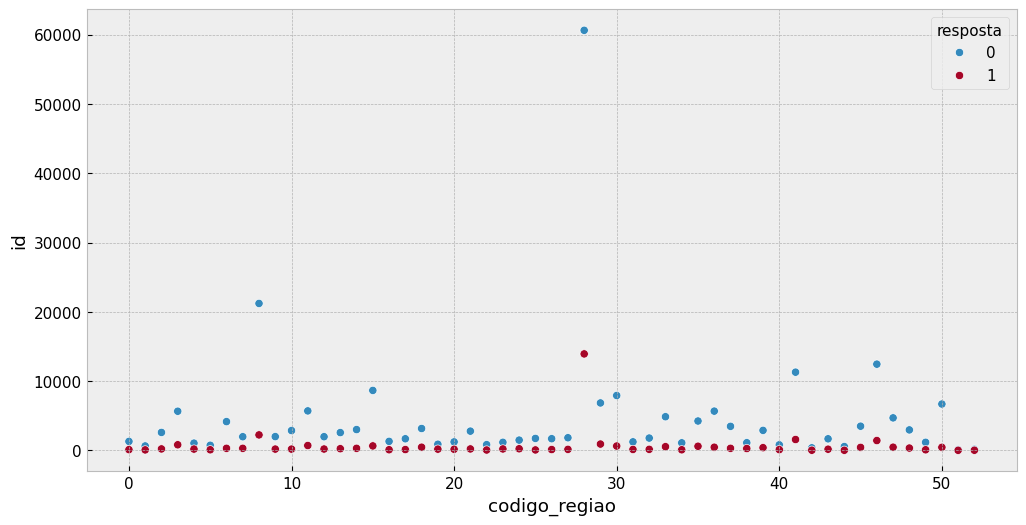

In [12]:
#'codigo_regiao'

aux1 = df[['id', 'resposta', 'codigo_regiao']].groupby(['codigo_regiao','resposta',]).count().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(x='codigo_regiao', y='id', data=aux1, hue='resposta')

Insight:

 - A variável resposta em relação ao código_região está muito junta, difícil de separar.

 - Não há uma separação clara dos valores. Poucas regiões tem uma separção mais clara.

 - Essa variável, possivelmente, deve ser agregada a outra para performar melhor no modelo.

In [13]:
del aux1

### 1.1.5 veiculo_danificado'

In [14]:
#'veiculo_danificado'
pd.crosstab(df['veiculo_danificado'], df['resposta']).apply(lambda x: x/x.sum(), axis=1)

resposta,0,1
veiculo_danificado,,
No,0.995,0.005
Yes,0.764,0.236


Insight:

 - Para os veículos danificados os consimidores praticamente não tem interesse, mas deve-se ter muita atenção.
     - Para estar assim, vai muito do negócio, mas podemos pensar que:
     - As pessoas que já bateram seu carro não tiveram boa experiência com seguros.
     - Já que não é pago o seguro do carro, para quê um seguro de saúde.
     - O custo de manter um seguro, pode ser muito alto.
    

 - Para aqueles que já tem seguro, isso muda, um pouco, a pesrpectiva, mas mesmo assim deve-se ter cuidado com essa variável.

### 1.1.6 idade_veiculo

In [15]:
#'idade_veiculo'

df[['idade_veiculo', 'resposta']].value_counts( normalize=True ).reset_index().sort_values(by='idade_veiculo')

,idade_veiculo,resposta,proportion
0,1-2 Year,0,0.435
2,1-2 Year,1,0.091
1,< 1 Year,0,0.413
4,< 1 Year,1,0.019
3,> 2 Years,0,0.030
5,> 2 Years,1,0.012


Insight:

A idade de 1 e 2 anos descrimina muito bem quem gostaria ou não contratar o produto.

### 1.1.7 contato_cliente

C:\Users\gbnob\AppData\Local\Temp\ipykernel_26400\2456382051.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x='resposta', y='contato_cliente', data=resposta1, estimator=sum, ci=None, color='lightblue')


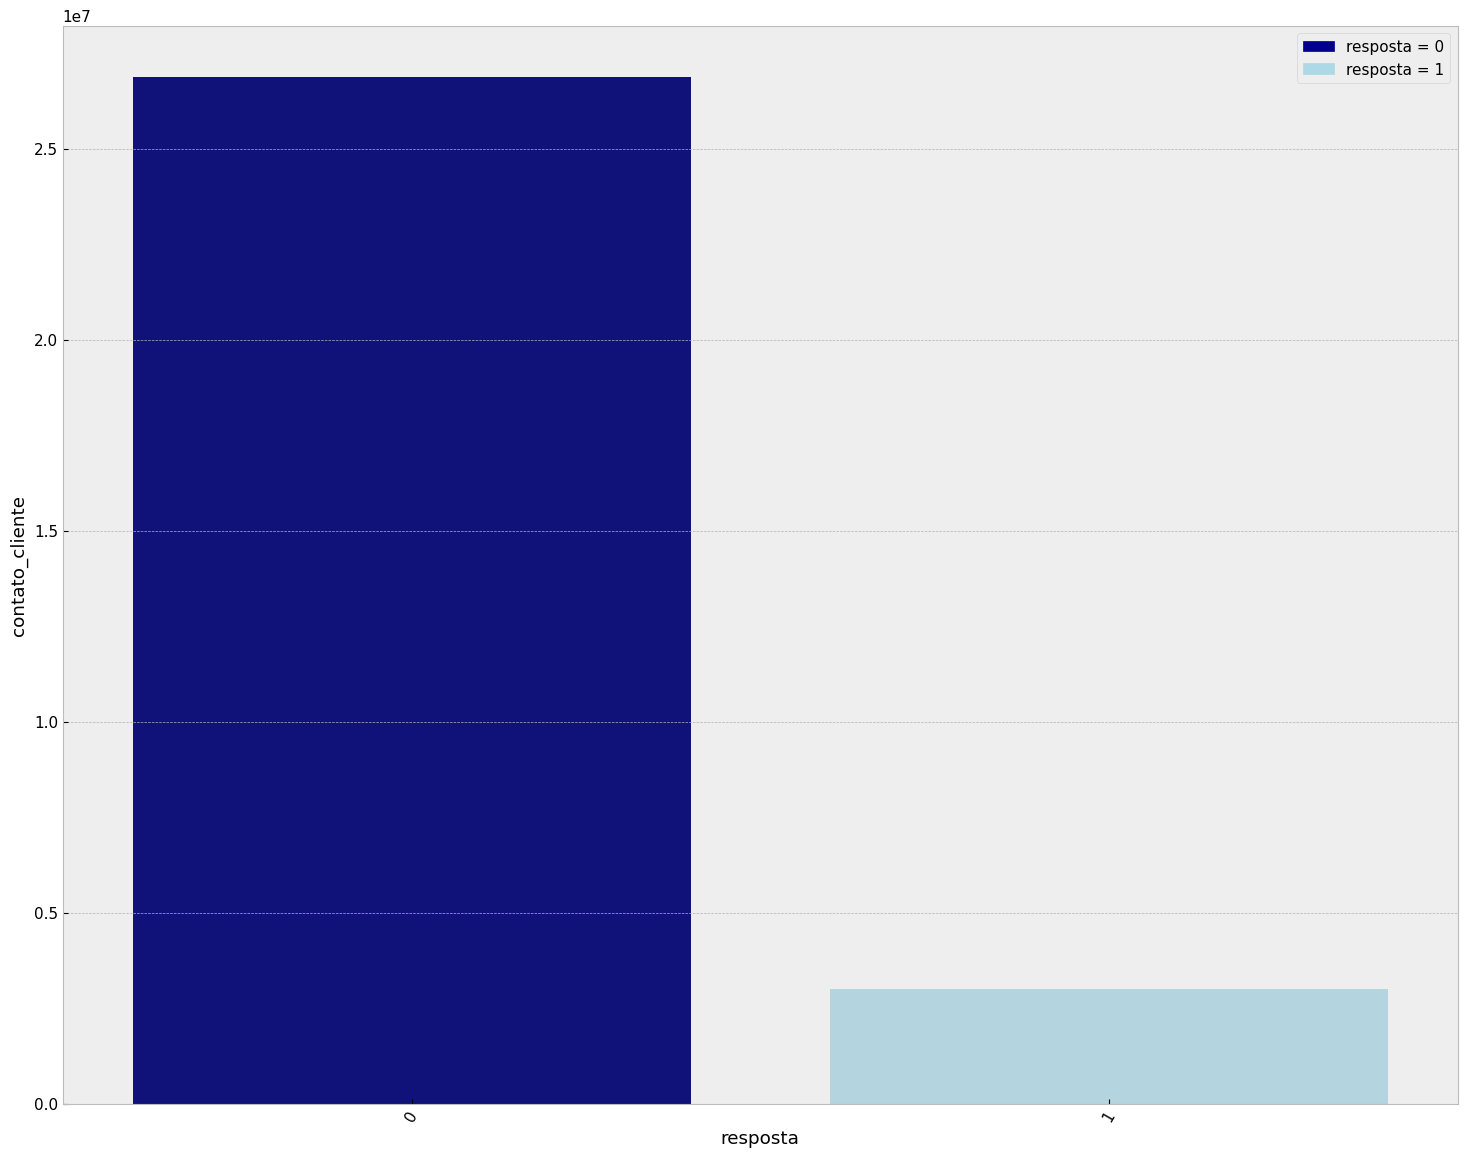

In [16]:
#aux1 = df.groupby(['contato_cliente'])['resposta'].sum().reset_index()
aux1 = df[['contato_cliente', 'resposta']].groupby(['resposta']).sum().reset_index()

bar1 = sns.barplot(x='resposta', y='contato_cliente', data=aux1, color='darkblue')

resposta1 = df[df.resposta==1]

bar2 = sns.barplot(x='resposta', y='contato_cliente', data=resposta1, estimator=sum, ci=None, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='resposta = 0')
bottom_bar = mpatches.Patch(color='lightblue', label='resposta = 1')
plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(rotation=60);
plt.show()

<Axes: xlabel='resposta', ylabel='contato_cliente'>

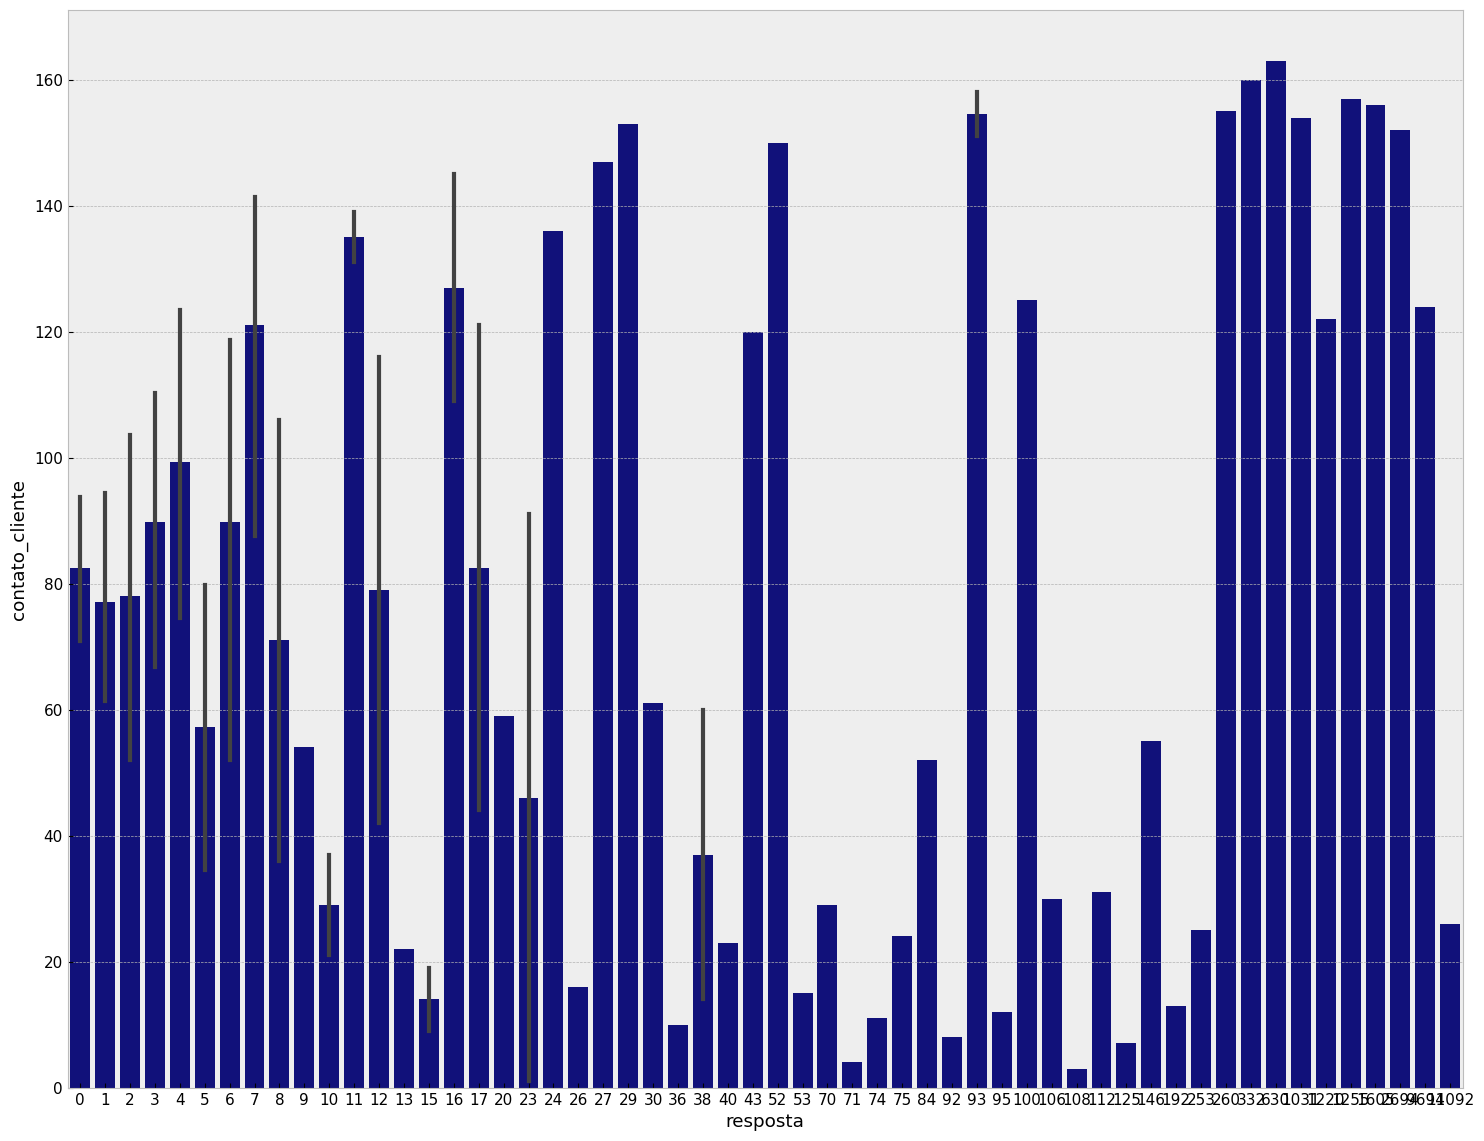

In [17]:
aux1 = df[['contato_cliente', 'resposta']].groupby(['contato_cliente']).sum().reset_index()

sns.barplot(x='resposta', y='contato_cliente', data=aux1, color='darkblue')

Insight:

Quais seriam os melhores canais para contato com esse cliente?

### 1.1.8 seguro_previo_automovel

<Axes: xlabel='seguro_previo_automovel', ylabel='resposta'>

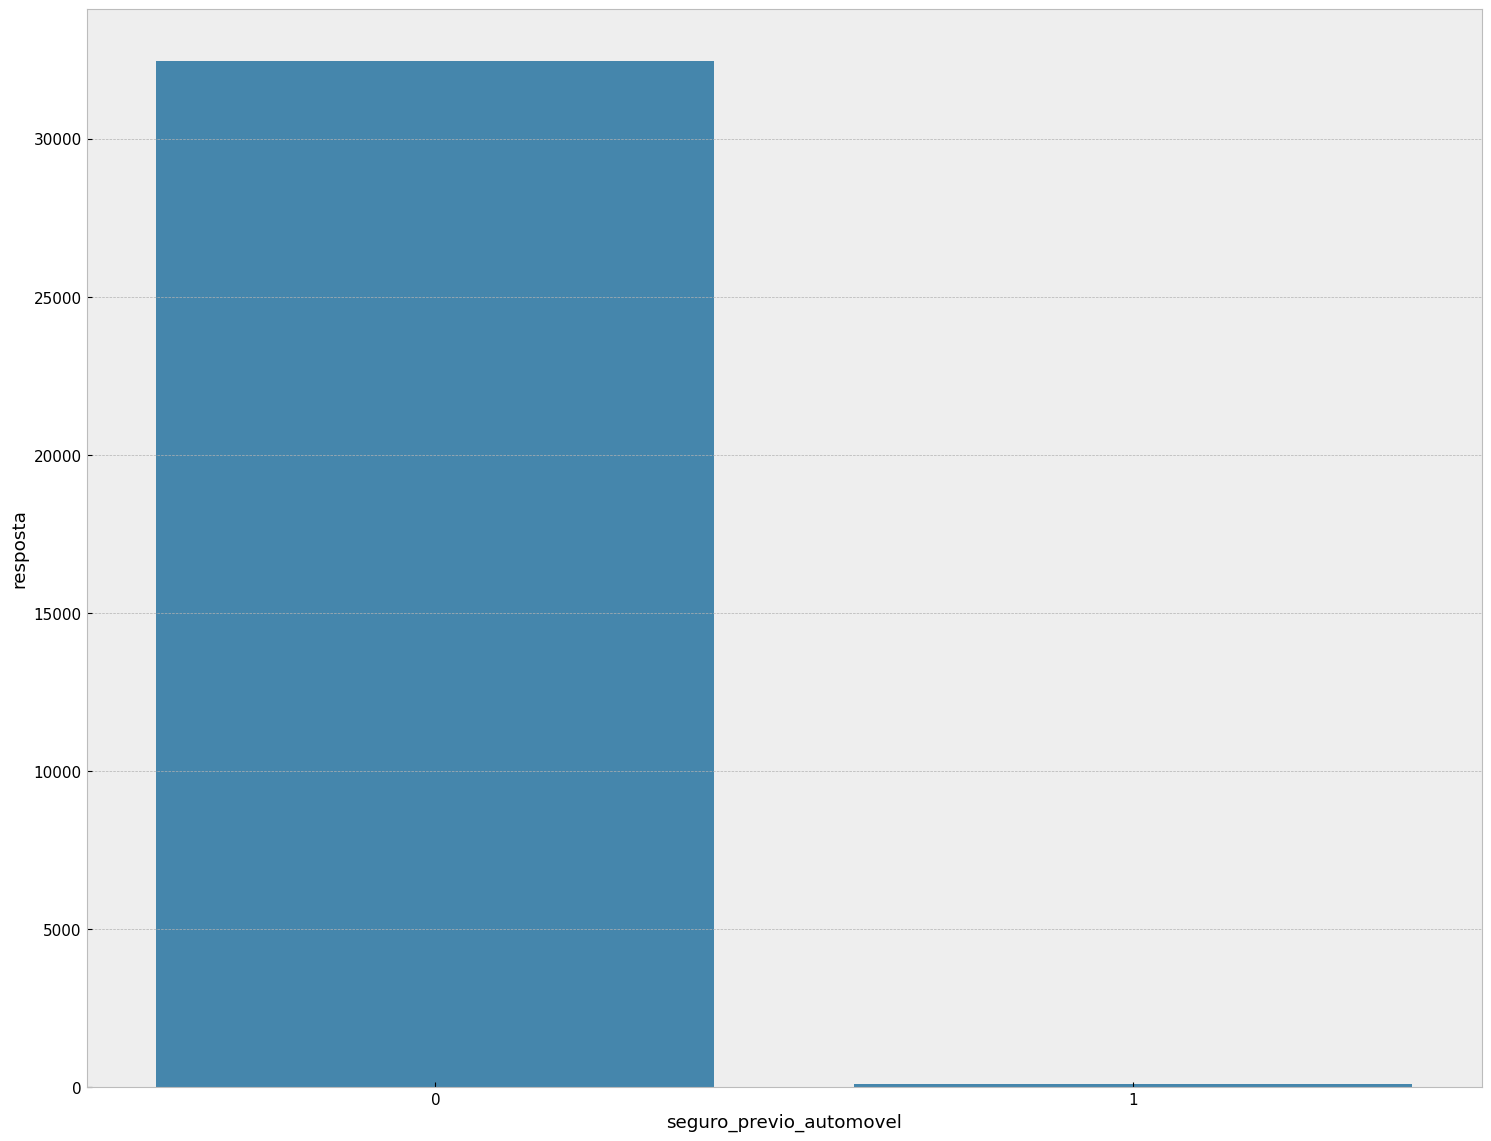

In [18]:
#'seguro_previo_automovel'
aux1 = df[['seguro_previo_automovel', 'resposta']].groupby(['seguro_previo_automovel']).sum().reset_index()
sns.barplot(x='seguro_previo_automovel', y='resposta', data=aux1)

### 1.1.9 cliente_dias_contrato

<Axes: xlabel='cliente_dias_contrato', ylabel='Count'>

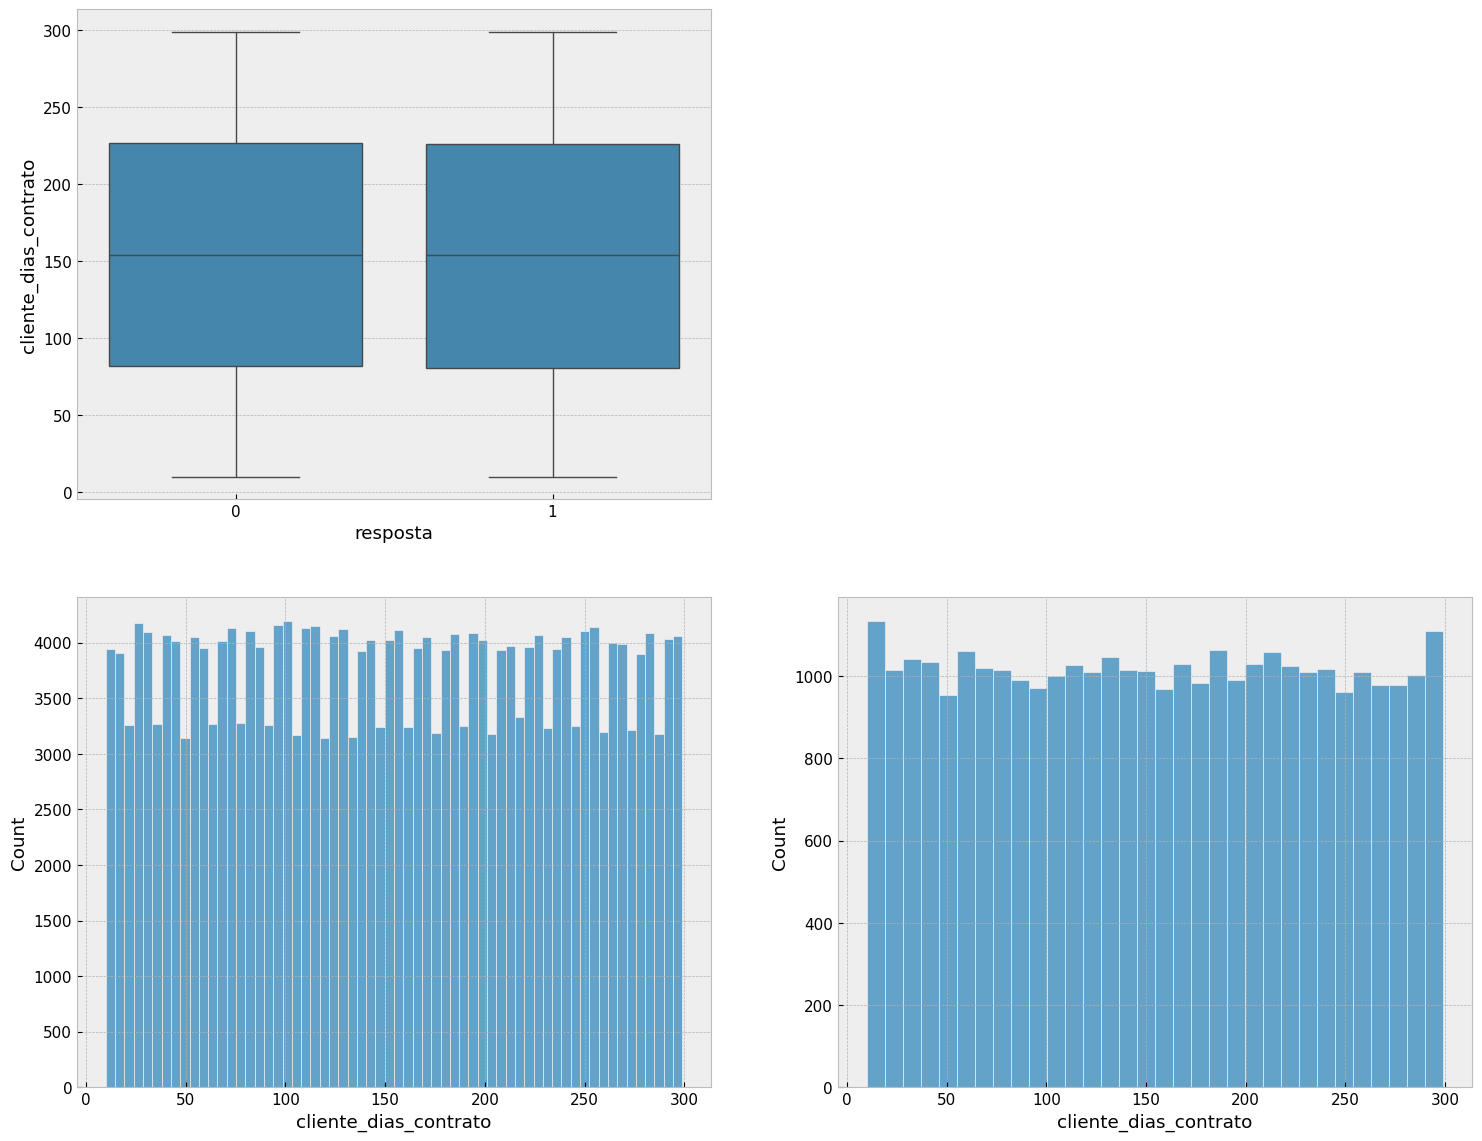

In [ ]:
#'cliente_dias_contrato'
#plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x='resposta', y='cliente_dias_contrato', data=df)


aux2 = df.loc[df['resposta'] == 0, 'cliente_dias_contrato_0']
plt.subplot(2,2,3)
sns.histplot(x=aux2)

aux3 = df.loc[df['resposta'] == 1, 'cliente_dias_contrato_1']
plt.subplot(2,2,4)
sns.histplot(x=aux3)

Insight:

## 1.2 Bivariada

## 1.3 Multivariada

## 1.4 Hipóteses
Inserida no __2º Cíclo CRISP__

In [20]:
del df